# Data processing of vessel mounted ADCP (RDI Workhorse 1200)

## Warning! Long one...
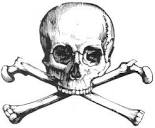


I consider, among the most usual 'data processing' in coastal physical oceanography, the data processing of moving ADCP one of the most challenging!  
There are many failure points... from the field procedures to the software malfuncioning... what it makes quite hard to automatize de processing.   
For example, in this case I realize there is a bug in the time record of the ADCP (software problem!) later on the processing, and need to go back to fix the issue...


1. The data were recorded with the software WinRiver 2  
2. During the operation, every time a new 'record' is started a file '000', '001', ... is created, with a last character 'n', 'r', etc...
3. Starting the WinRiver II

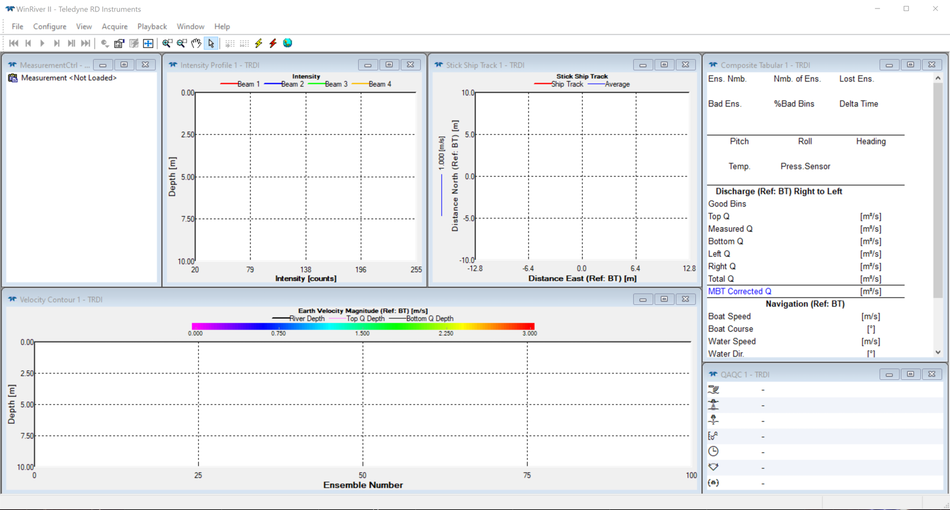




3.1 File -> Create measurement from file --> select your file (xxxxr.00n)  

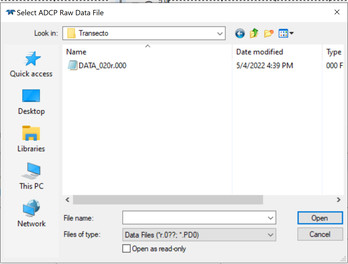  

3.2 In the example, click on 'Trajeto 020', and a list of options will pop up...   

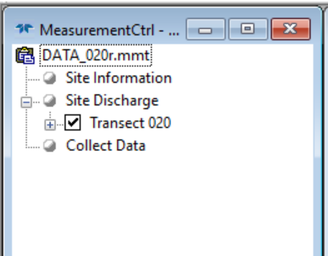

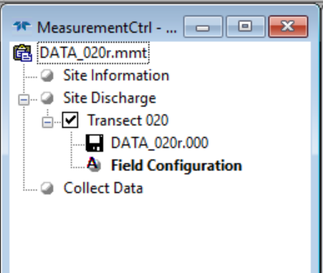


3.3 Double click on 'DATA_020r.000' will 'play' the file, and the data will show up. Bigger data files will take a while...
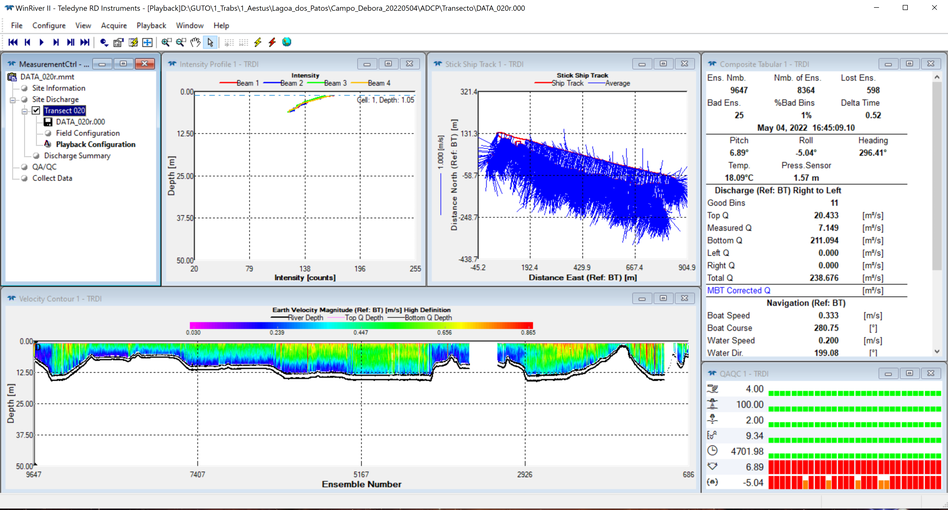

3.4 Couble click on Playback Configuration to check the transducer level and magnetic declination are correct... change if necessary and OK. The file will 'play' again with the changed offsets!

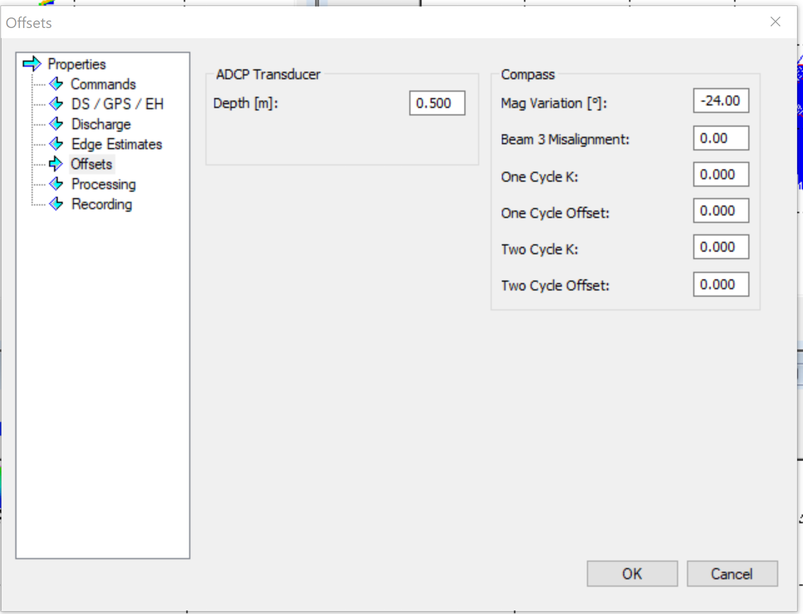

3.6 To export the data, in 'Configure' --> 'ASCII Output' --> 'Generica ASCII Output'

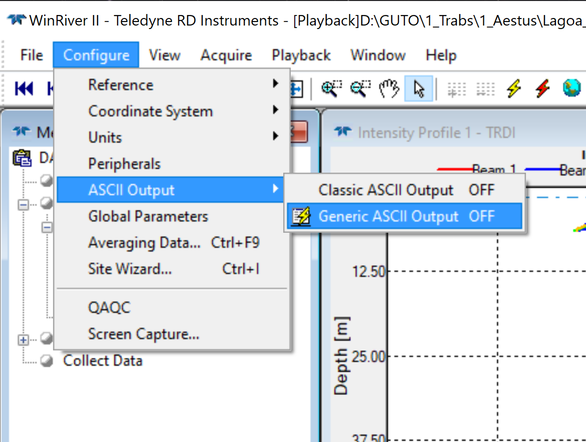
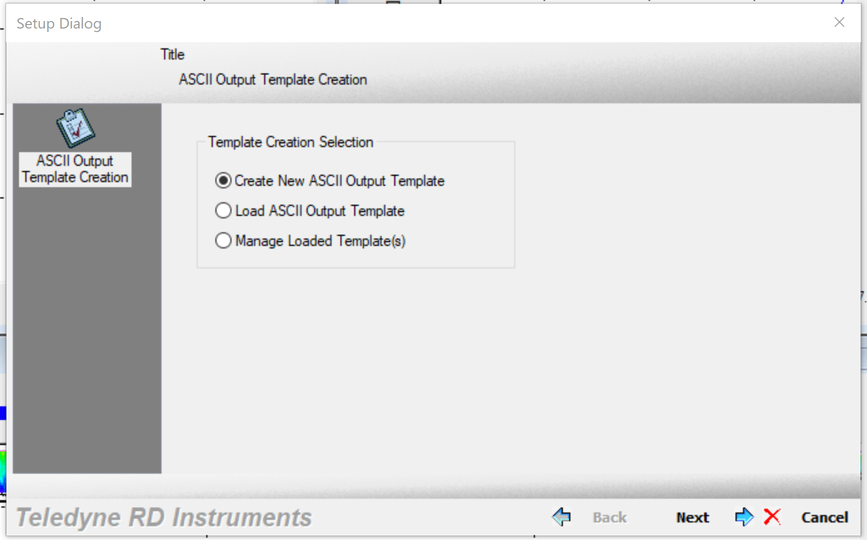

3.6.1 Create New Model of Output or upload pre-existing one (file with '.ttf' extension, which mixedup with 'true type font' and the Windows assume to be one...)
Selecting 'create', a list of items will show up to be selected. It is a lot! You may consult the Table 5 from the user guid of WinRiverII. Here I choose the ones I think are the most important. Don't worry about the order... you can drag the items up and down later.   

0 - Ensemble Number  
2 - Ensemble Time  
493 - GGA Longitude  
491 - GGA Latitude 
169 - Beams Average Depth  
467 - Number of Bins  
468 - Bin Size  
470 - Blank
6 - Depth  
21 - Average Backscatter  
23 - East Velocity (Ref: BT)  
24 - North Velocity (Ref: BT)  




### Warning: 
I learnt later that a '.ttf' generated in different WinRiverII versions work differently... be cautions! Double check later in the Jupyter. The numbers may change too...

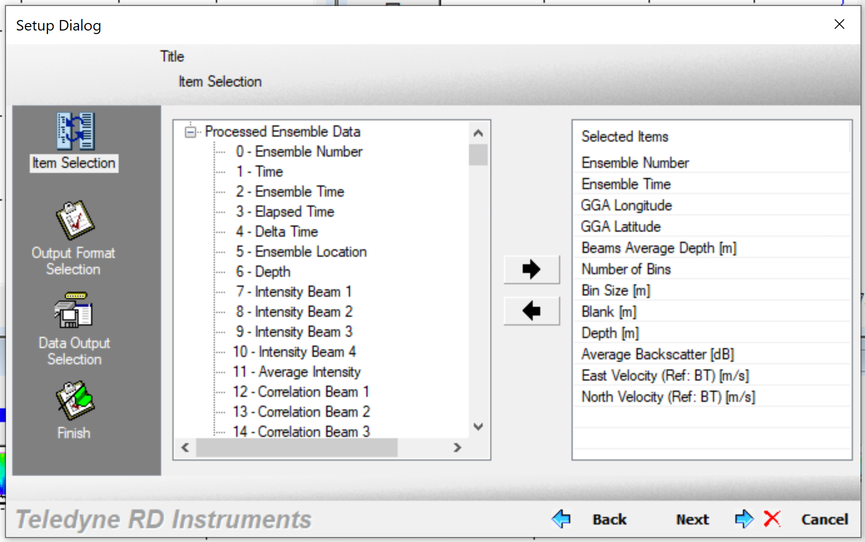

3.6.2 In 'Format selection', check 'space' as parameter delimiter  
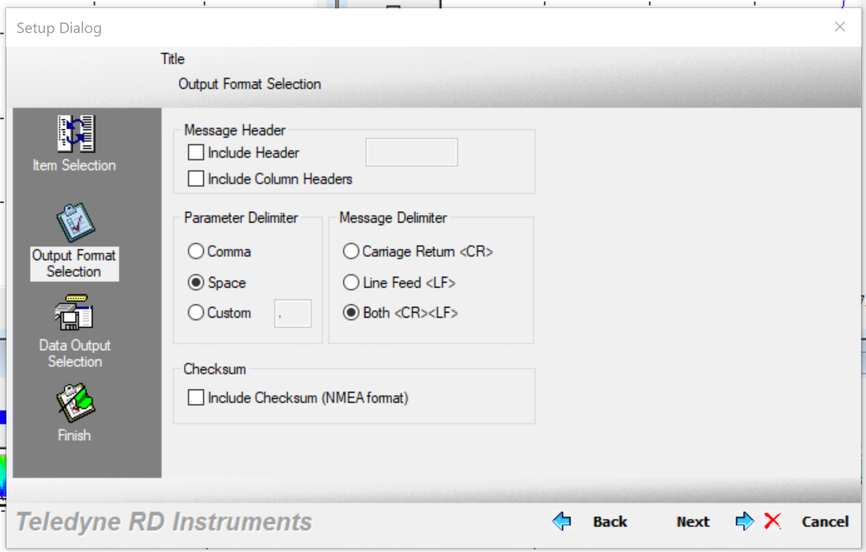


3.6.3 Go on... in 'Selection of Data Output', check 'To file'  
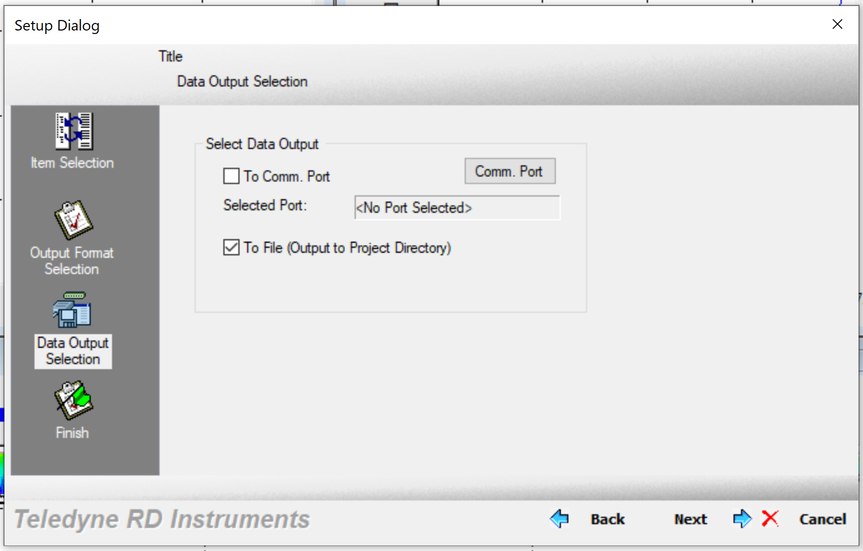


3.6.4 In 'Finalize', click in 'Browse', and name the '.ttf' file.   
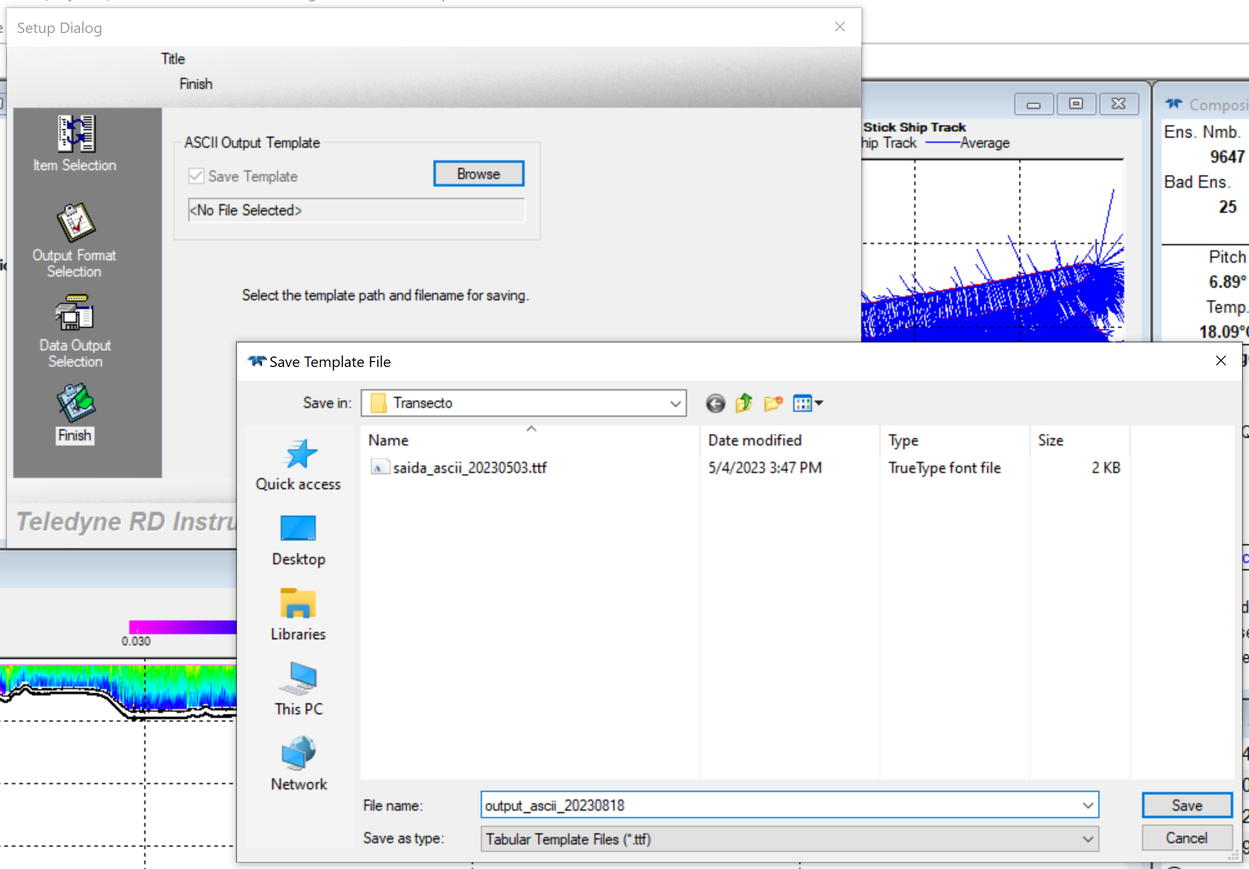

When 'OK', another item will show up from the branches. You must double click on 'Data_020r.000' to play again and create the output file.  
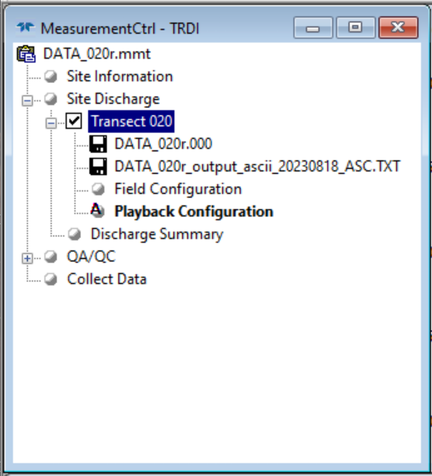

In the working directory the '.ttf' file will show up, and a second file with the same name ending with 'ASC' and extension '.TXT'  
<br>
In the figure below, there are two temptatives... one which I've done with an older version (in Portuguese) of WinRiver, and the 'fft' name comes in front of the original file. With the newer version (in English), the 'fft' name comes later. They have absolutely the same size. I'll explain later on...
 
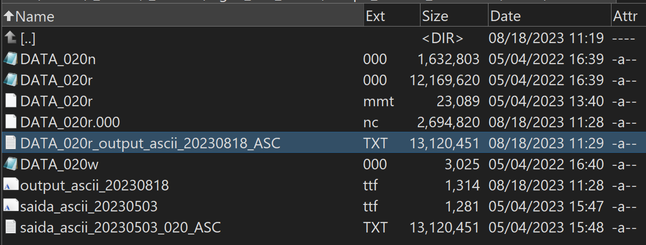

# 4. In Jupyter...

In [1]:
'''
Ascii built in the last version of WinRiver2
'''
path = r'd:\GUTO\1_Trabs\1_Aestus\Lagoa_dos_Patos\Campo_Debora_20220504\ADCP\Transecto\\'
# ascii_file = 'saida_ascii_20230503_020_ASC.TXT'
ascii_file = 'DATA_020r_output_ascii_20230818_ASC.TXT'
with open(path + ascii_file) as io:
    dataset = io.read().splitlines()
    
len(dataset)

8962

Each line is a string... the paramters selected are separated by spaces, and the items inside the parameters, when more than 1, are separated by commas.

The '-32768' is a flag for 'bad data'


In [2]:
print(len(dataset[0]))
print(len(dataset[0].split()))
print(dataset[0])

1454
12
686 1651678007.11999990 -32768 -32768 6.73500000 50 0.50000000 0.50000000 1.550,2.050,2.550,3.050,3.550,4.050,4.550,5.050,5.550,6.050,6.550,7.050,7.550,8.050,8.550,9.050,9.550,10.050,10.550,11.050,11.550,12.050,12.550,13.050,13.550,14.050,14.550,15.050,15.550,16.050,16.550,17.050,17.550,18.050,18.550,19.050,19.550,20.050,20.550,21.050,21.550,22.050,22.550,23.050,23.550,24.050,24.550,25.050,25.550,26.05000000 83.959,88.048,87.171,85.291,79.367,78.530,78.539,77.796,77.723,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768 0.009,-32768,-32768,0.184,0.308,0.137,0.370,0.277,0.242,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768

### To go on, we need some packages... in a 'trully' notebook, it is a good pratice do this in the first cells..

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Breaking down the ASSCII data...  
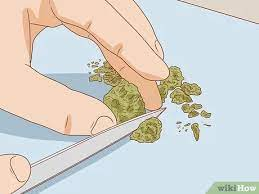!

In [4]:
latitude = []
longitude = []
depth = []
time = []
vel_u = []
vel_v = []
abs = [] # acoustic backscatter --> for data quality check, and for those who like suspende sediment stuff...

for d in dataset[1:]: # first row is garbage 
    dq = d.split() # break the line
    time.append(mdates.num2date(float(dq[1])/(24*3600)))   # from the user guide... seconds from 1/1/1970
    longitude.append(float(dq[2]))
    latitude.append(float(dq[3]))
    depth.append(float(dq[4]))
    
    # the 'broken' items with more than on element are 'list' objects!
    levels = [float(x) for x in dq[8].split(',')] # distance from the transducer
    
    g_abs = [float(x) for x in dq[9].split(',')] 
    g_vel_u = [float(x) for x in dq[10].split(',')]
    g_vel_v = [float(x) for x in dq[11].split(',')]
    
    abs.append(g_abs)
    vel_u.append(g_vel_u)
    vel_v.append(g_vel_v)

# convert list to numpy array (slicebles...)
time = np.array(time)
longitude = np.array(longitude)
latitude = np.array(latitude)
depth = np.array(depth)
levels = np.array(levels)
abs = np.array(abs)
vel_u = np.array(vel_u)
vel_v = np.array(vel_v)

# replacing the 'bad' data for np.nan
depth[depth == -32768] = np.nan
abs[abs == -32768] = np.nan
vel_u[vel_u == -32768] = np.nan
vel_v[vel_v == -32768] = np.nan

##  {Interlude}

When I was way further in the processing, I did a plot between longitude by the time, and find out that there was something strange with the time.  

This dataset was generated by a single file, recording continually during the survey. So, we expected a regular data record, with constant time intervals.   

What we have, surprisingly, there is a weird change in the time, going back by months, and then returning to the normal time step... or, we have a sort of 'bug' in the recording.  

Because this, I asked to RDI for the latest version of WinRiver2 and repeat the exporting procedure to see if this problem would persist or not. It persist! F..k  

It is much unlikely you'll have a similar issue... so, just jump the next cells, or keep on track to see a way to fix this. 


(0.0, 1000.0)

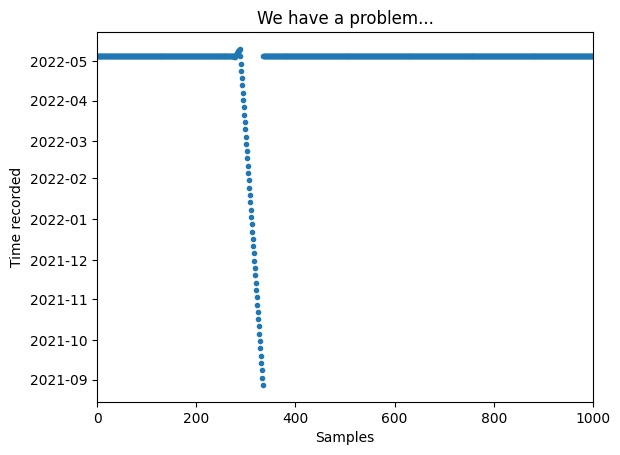

In [5]:
plt.plot(time, '.')
plt.xlabel('Samples')
plt.ylabel('Time recorded')
plt.title('We have a problem...')
plt.xlim(0, 1000)

When we face such a problem... one thing is to weight if it is worth to fix.  
For example, if this strech of data is garbage that will not be used further... so the easiest way to 'solve' is just cut it off from the dataset by slicing. An we don't have a problem anymore!     
But lets fix it...  
First we need to find out the 'bad' points, zooming the x-axis.

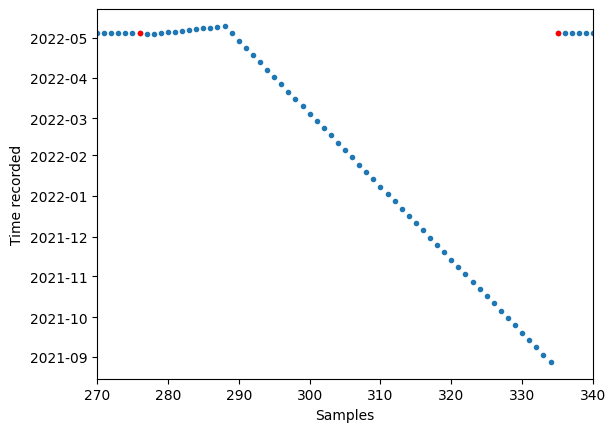

In [6]:
'''
Finding the indexes of the limits of the bad data! Marking them with red dots!
''' 
plt.plot(time, '.')
plt.xlabel('Samples')
plt.ylabel('Time recorded')
plt.xlim(270, 340) # change to zoom the find the index limits of the gap
plt.plot(276, time[276], '.r')
plt.plot(335, time[335], '.r')

Below I used the time indicated by the red dots above, and the final result as the figure below. This is because the scale of variation of Y... it is some improvement since all data is in the same day. We need extend the limits of the 'bad times'.

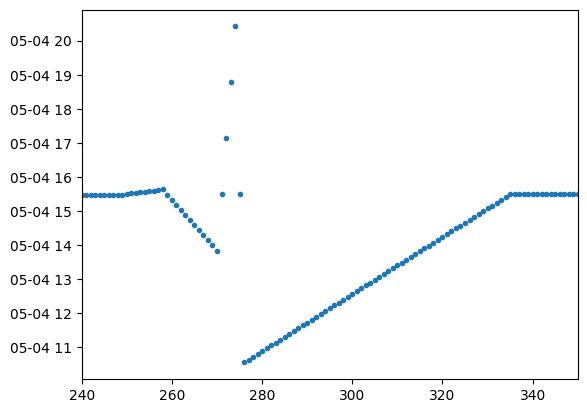

In [7]:
'''
Explicitely, getting the values and creating a continiuous arrange of corrected values! Can't use the datetime objects, so must do this back and forth using MDATES
'''
# i1 = 276 # this were the values of the first try!
# i2 = 335

i1 = 240
i2 = 340

t1 = time[i1]
t2 = time[i2]
t1n = mdates.date2num(t1)
t2n = mdates.date2num(t2)

i = np.arange(i1, i2+1) # remember that the arange don't include the last value!
tt = np.linspace(t1n, t2n, len(i))
tt2 = mdates.num2date(tt)

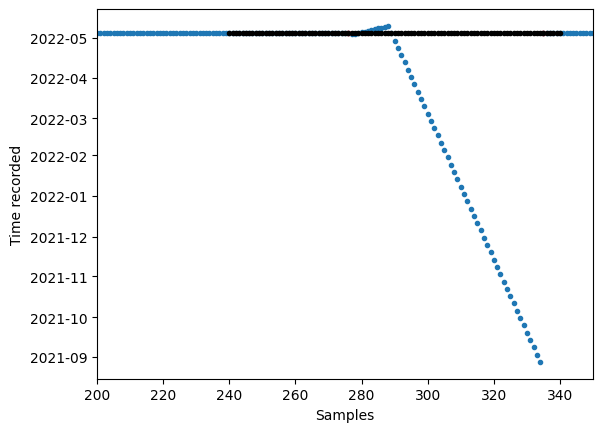

In [8]:
'''
Checking visualy. Looks good...
'''
plt.plot(time, '.')
plt.xlabel('Samples')
plt.ylabel('Time recorded')
plt.xlim(200, 350) # change to zoom the find the index limits of the gap
plt.plot(276, time[276], '.r')
plt.plot(335, time[335], '.r')

plt.plot(i, tt2, '.k')

Text(0.5, 1.0, 'Problem gone...')

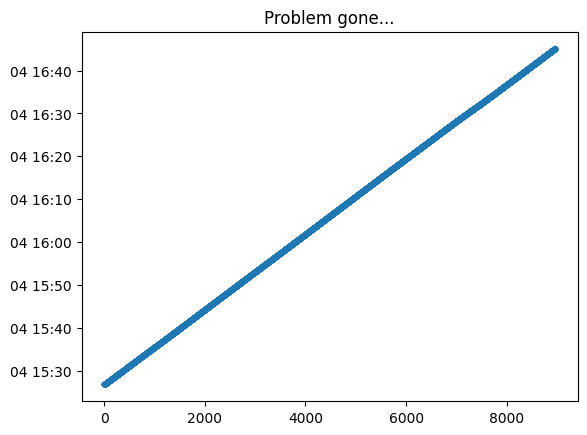

In [9]:
'''
Now is just to replace the 'bad times' for the 'good times' :-)
'''
time[i] = tt2
plt.plot(time, '.')
plt.title('Problem gone...')
# plt.xlim(240,350)

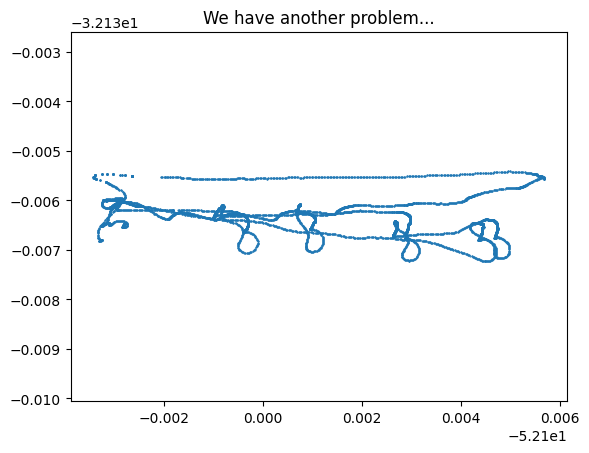

In [10]:
'''
Checking the track.
'''
plt.plot(longitude, latitude, '.', ms=1)
plt.axis('equal')
plt.title('We have another problem...')
plt.show()

We have some gaps along the track... this does not mean we don't have ADCP data (currents & abs), only the GPS get a little crazy... this is not so uncommon!  

Since the strech of missing GPS data is small, we can just interpolate from the existing points, similar as we have done with the time above!

To do that, we first remove the 'nan' 


In [11]:
'''
Finding the indexes of nan in the coordinates
''' 
idx_not_nan = np.array(np.where(np.isnan(longitude) == True)).squeeze()

len(idx_not_nan)

0

0 nan? The code works... despite I do this frequently, I also do quick tests to check my dumbness creating a dummy array like  
x = np.array([1, 1, 1, np.nan, 1, 1])  
So I'll be sure I have a nan at x[3]  
A quick way to check there are nans in an array is doing some math operation which returns nan if there is a single nan in the array...

In [12]:
np.min(longitude)

-52.10343

There is no nans... let's see the longitude more carefully...

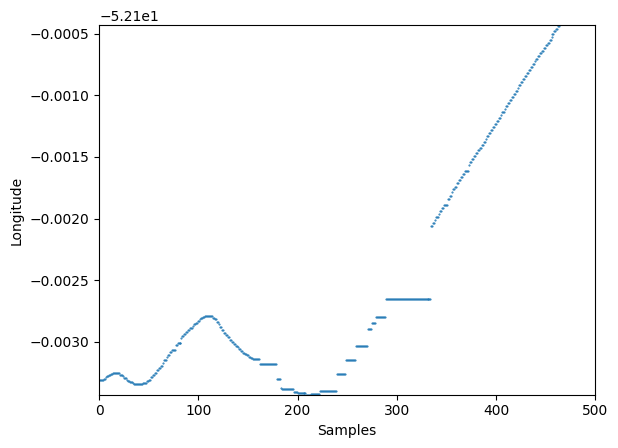

In [13]:
plt.plot(longitude, '.', ms=1) # need use markers otherwise the line will joint the samples and the lags will be hidden
plt.xlim(0, 500)
plt.ylim(np.min(longitude), np.min(longitude)+0.003)
plt.xlabel('Samples')
plt.ylabel('Longitude')
plt.show()

The boat was moving, but the longitude freezes producing this stair like pattern. Even we are stoped in a point, the GPS never repeats an value! This means that identical values of longitude/latitude means bad GPS data (after the first non-repeated value!)

In [14]:
'''
To find out the first non-repeated values of the coordinates
'''
lon_ref = -99999
i_lon_ref = [] # to save the indexes
v_lon_ref = [] # to save the values
v_lat_ref = [] # we'll need the latitude too
for i, l in enumerate(longitude):
    if l != lon_ref:
        i_lon_ref.append(i)
        v_lon_ref.append(l)
        v_lat_ref.append(latitude[i])
        lon_ref = l

I wrongly thought that I would pick only the most obvious repetitions showed in the 'stair case'... but after checking the figure below, I realize that repeated values must be very common since the ADCP sampling rate was less the 1 s and the GPS update is at 0.5 Hz (each 2 seconds)... 

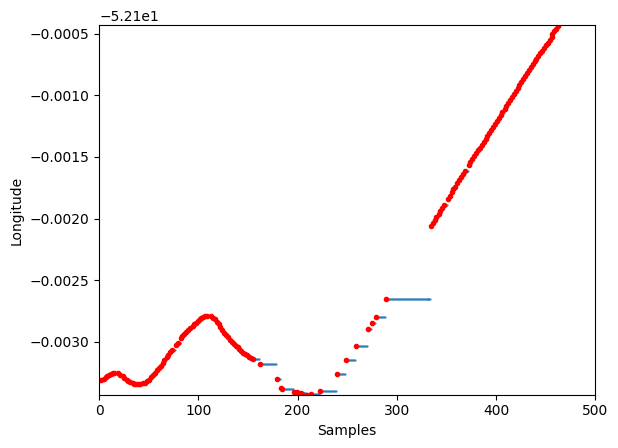

In [15]:
plt.plot(longitude, '.', ms=1)
plt.plot(i_lon_ref, v_lon_ref, 'r.')
plt.xlim(0, 500)
plt.ylim(np.min(longitude), np.min(longitude)+0.003)
plt.xlabel('Samples')
plt.ylabel('Longitude')
plt.show()

Now, it is just a matter of interpolation!

In [16]:
time_n = mdates.date2num(time)

time_ref = time_n[i_lon_ref]

lon_interp = np.interp(time_n, time_ref, v_lon_ref)
lat_interp = np.interp(time_n, time_ref, v_lat_ref)

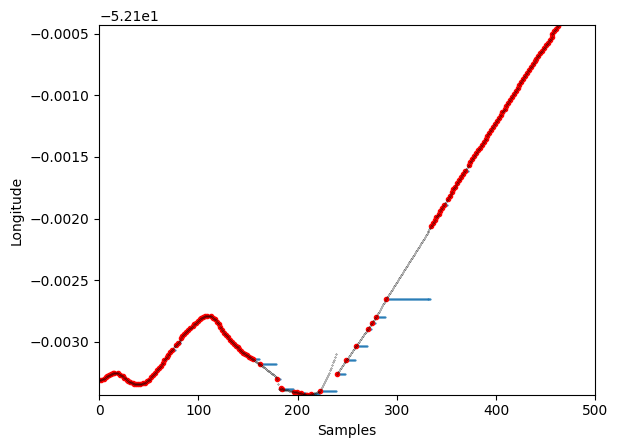

In [17]:
plt.plot(longitude, '.', ms=1)
plt.plot(i_lon_ref, v_lon_ref, 'r.')
plt.plot(lon_interp, 'k.', ms=.5)
plt.xlim(0, 500)
plt.ylim(np.min(longitude), np.min(longitude)+0.003)
plt.xlabel('Samples')
plt.ylabel('Longitude')
plt.show()

There still some strange data around the sample 230... but on general, the problem is solved. 

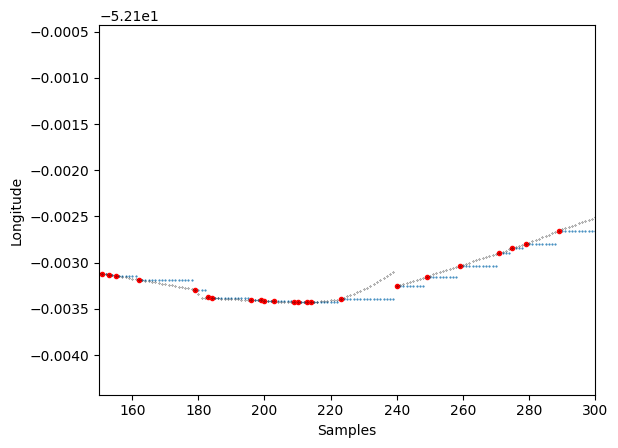

In [18]:
plt.plot(longitude, '.', ms=1)
plt.plot(i_lon_ref, v_lon_ref, 'r.')
plt.plot(lon_interp, 'k.', ms=.5)
plt.xlim(150, 300)
plt.ylim(np.min(longitude)-0.001, np.min(longitude)+0.003)
plt.xlabel('Samples')
plt.ylabel('Longitude')
plt.show()

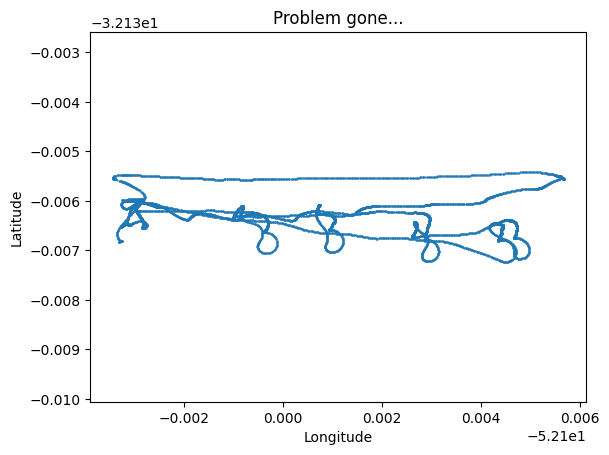

In [19]:
plt.plot(lon_interp, lat_interp, '.', ms=1)
plt.axis('equal')
plt.title('Problem gone...')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
'''
Just housekeeping...
'''
longitude = lon_interp
latitude = lat_interp

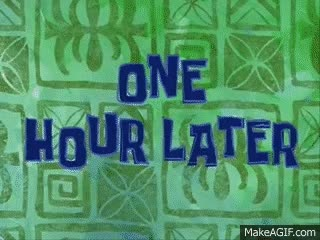

## Context...   

Dealing with data from moving vessels in small scale is tricky. I strongly recommned to have a base map of the study site to have a better insight about what you doing and where!  

Here I upload a clipping form a nautical chart created in Qgis and save as geotiff

https://gutoschettini.github.io/IPYNB-Collection/11_BaseMap_from_QGIS_XYZTiles.html

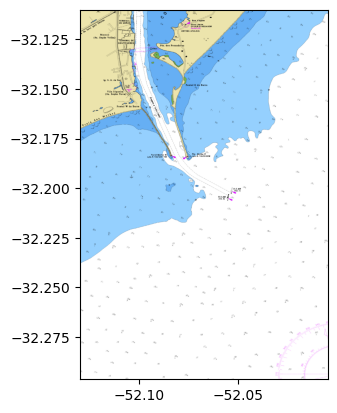

In [21]:
import rasterio
import rasterio.plot as rplot

basemap_path = r'd:\GUTO\1_Trabs\1_Aestus\Lagoa_dos_Patos\BaseGeografica\\'
basemap = rasterio.open(basemap_path + 'Recorte_BarradeRioGrande_cartanautica.tif')
rplot.show(basemap)
plt.show()

### Now I can see, effectively, if my data is where it supposed to be!

(-52.12, -52.08)

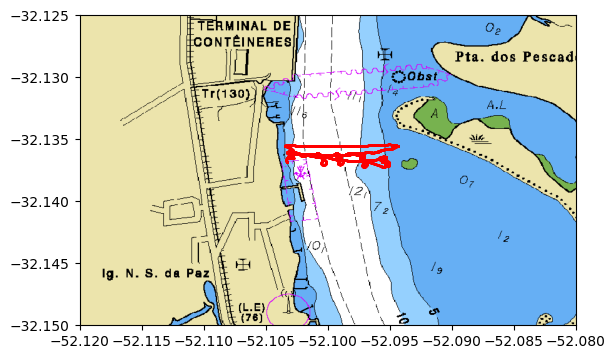

In [22]:
fig, ax = plt.subplots()
plt.plot(longitude, latitude, 'r.', ms=1)

rplot.show(basemap, ax=ax)
plt.ylim(-32.15, -32.125)
plt.xlim(-52.12, -52.08)

## Some more context...  

During this survey, because I was there and I planned it :-), it started at western bank.   
First we only recorded the ADCP moving east... at the eastern bank, we spin the boat and return to the western bank, stoping to cast the CTD several times...   
and then we positioned the boat at five stations along the cross section to used the Rockland's microCTD... in every station we need to cast the microCTD at least 5 times, when the boat drift with the currents... at this time, we returned to the starting point after the third cast! Because all this, the track looks like that!  
The ADCP recorde all the time. So, we need to know where are the 'starting' and 'ending' samples we want.

### Capturing important moments... 

The cell below, we repeat it and stop the notebook when it reaches at the desired position, checking the counting!  

Be patient!!!   

It looks like the plot below, but takes time

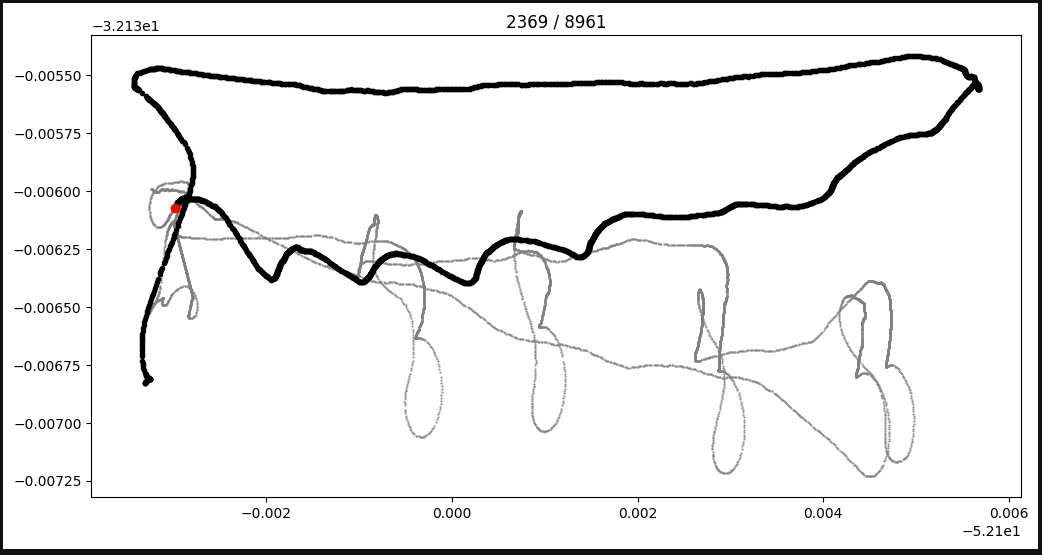

In [23]:
from IPython import display
import time as Pytime

In [24]:
''' 
points selected from the visual inspection of the animation
I run the cell below, and when the red dot reach the point of interest, I stop the notebook, and add the index in 'pts'
The first 2 are the 'ADCP' section, the following 2 are the ADCP/CTD section
'''
pts = [225, 852, 942, 2335]

In [27]:
'''
Slow animation... un-comment to execute.
'''
# fig, ax = plt.subplots(figsize=(12, 6))

# for i, (lo, la) in enumerate(zip(longitude, latitude)):
#     if i > np.max(pts):
#         ax.plot(longitude, latitude, '.', ms=1, color=[.5, .5, .5])
#         ax.plot(longitude[:i], latitude[:i], '.k')
#         ax.plot(lo, la, 'or')
#         ax.set_title(str(i) + ' / ' + str(len(longitude)) )
#         display.display(plt.gcf())
#         Pytime.sleep(0.001)
#         plt.cla()
#         display.clear_output(wait=True)


'\nSlow animation... un-comment to execute.\n'

942, 2335

Now separating the transects by the sample numbers... and, after the work a ove to fix the time and position, there was really no ACDP data in that strech of data... a bit of waste of time that could be avoided if we have seem the data before... ces't la vie. Good for praticing 'fixing' data.   

So, we'll have to focus on the second transect. The main difference is in this one the boat slow down to cast the CTD during the navigation.

In [32]:
# first transect (only ADCP)
start = 225
end = 852 

s_time = time[start:end]
s_depth = depth[start:end]
s_abs = abs[start:end, :]
s_vel_u = vel_u[start:end, :]
s_vel_v = vel_v[start:end, :]

C:\Users\gutos\AppData\Local\Temp\ipykernel_6804\3103076961.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  axs[0].pcolor(s_time, -levels, s_abs.T, cmap='rainbow')
C:\Users\gutos\AppData\Local\Temp\ipykernel_6804\3103076961.py:4: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  axs[1].pcolor(s_time, -levels, s_vel_u.T, cmap='rainbow')
C:\Users\gutos\AppData\Local\Temp\ipykernel_6804\3103076961.py:5: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, ple

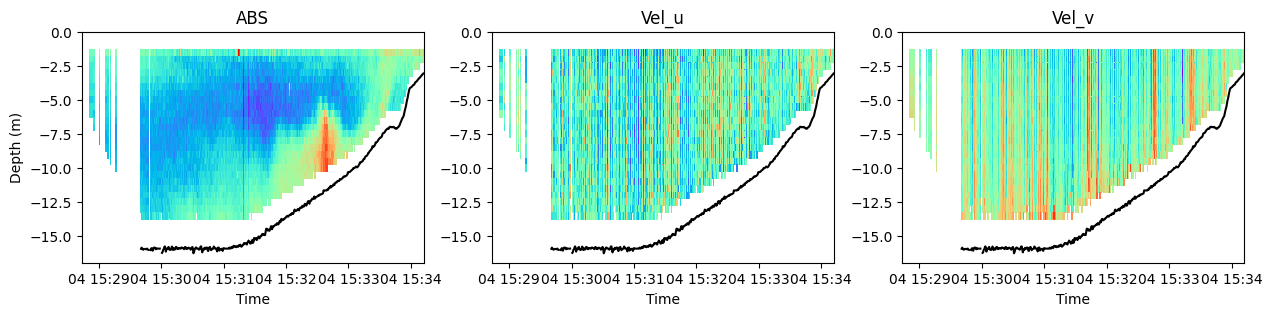

In [38]:
fig, axs = plt.subplots(1,3, figsize=(15,3))

axs[0].pcolor(s_time, -levels, s_abs.T, cmap='rainbow')
axs[1].pcolor(s_time, -levels, s_vel_u.T, cmap='rainbow')
axs[2].pcolor(s_time, -levels, s_vel_v.T, cmap='rainbow')

axs[0].set_ylabel('Depth (m)')
titles = ['ABS', 'Vel_u', 'Vel_v']
for i, ax in enumerate(axs):
    ax.plot(s_time, -s_depth, 'k')
    ax.set_title(titles[i])
    ax.set_xlabel('Time')
    ax.set_ylim(-17, 0)
    

In [44]:
# second transect (ADCP + CTD)
start = 942
end = 2335

s_time = time[start:end]
s_longitude = longitude[start:end]
s_latitude = latitude[start:end]
s_depth = depth[start:end]
s_abs = abs[start:end, :]
s_vel_u = vel_u[start:end, :]
s_vel_v = vel_v[start:end, :]

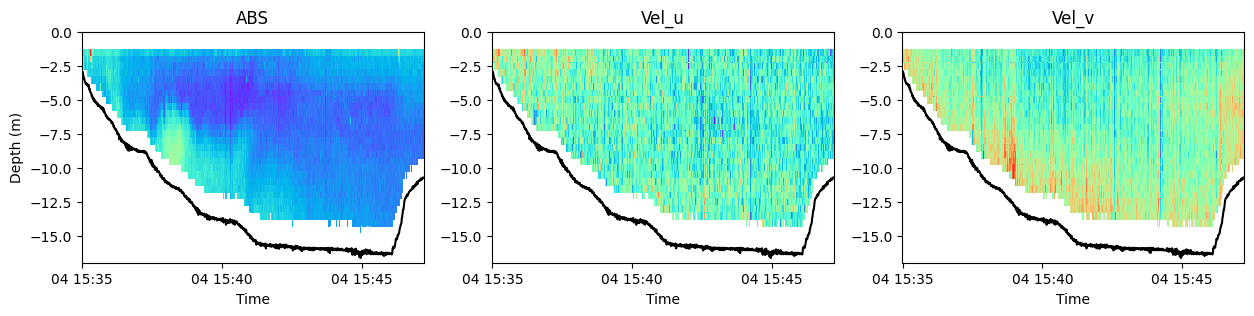

In [40]:
fig, axs = plt.subplots(1,3, figsize=(15,3))

axs[0].pcolor(s_time, -levels, s_abs.T, cmap='rainbow')
axs[1].pcolor(s_time, -levels, s_vel_u.T, cmap='rainbow')
axs[2].pcolor(s_time, -levels, s_vel_v.T, cmap='rainbow')

axs[0].set_ylabel('Depth (m)')
titles = ['ABS', 'Vel_u', 'Vel_v']
for i, ax in enumerate(axs):
    ax.plot(s_time, -s_depth, 'k')
    ax.set_title(titles[i])
    ax.set_xlabel('Time')
    ax.set_ylim(-17, 0)
    

Now that we have the selected data to work, we must 'reduce' it... we use to set the ADPC to sample as fast as possible and average the data later... or, the ADCP can set up to record at a slower rate averaging during the record. Both ways are ok! Here we have the former way.   

We can do a 'time-average', which is basically to average in time periods (e.g., 30 s), or we can do a 'space-average', based on the distance across the section (e.g., 50 m). I'll do the latter because our goal is to have the representatin of the velocity field. 

First we need to find out a point aligned with the cross section far away (some km) to use as reference for distances... this is due to minimized the deviations of the track from the straight line. 

In [42]:
# the time interval of ADCP profiles...
dt = s_time[1] - s_time[0]
print(dt)

0:00:00.520000


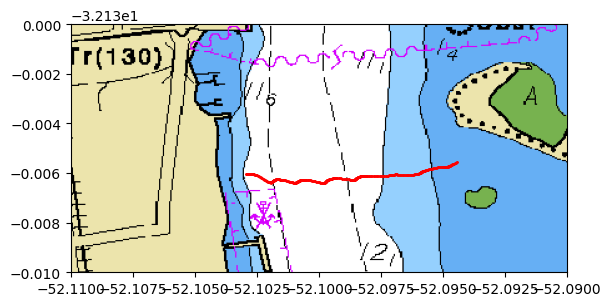

In [76]:
fig, ax = plt.subplots()
ax.plot(s_longitude, s_latitude, 'r.', ms=1)
rplot.show(basemap, ax=ax)
ax.set_ylim(-32.14, -32.13)
ax.set_xlim(-52.11, -52.09)
plt.show()

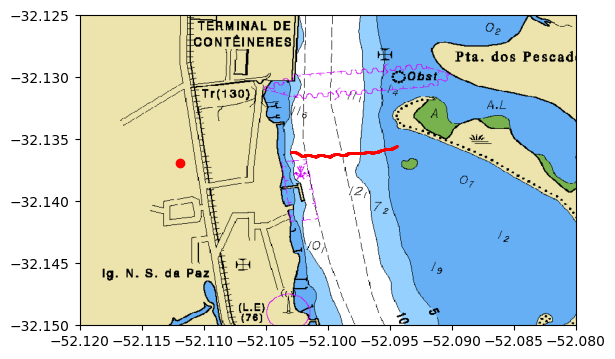

In [77]:
from scipy.stats import linregress


# finding the linear model of the latitude(longitude)
res = linregress(s_longitude, s_latitude)
slope = res.slope
intercept = res.intercept

# setting a reference point
xref = np.min(s_longitude) - 1/111.120  # about 1 km westwards
yref = intercept + slope*xref

fig, ax = plt.subplots()
ax.plot(s_longitude, s_latitude, 'r.', ms=1)
ax.plot(xref, yref, 'ro')
ax.plot
rplot.show(basemap, ax=ax)
ax.set_ylim(-32.15, -32.125)
ax.set_xlim(-52.12, -52.08)
plt.show()

In [85]:
dx = s_longitude - xref
dy = s_latitude - yref

distance = (dx**2 + dy**2)**.5 *111.12

distance = distance - np.min(distance)

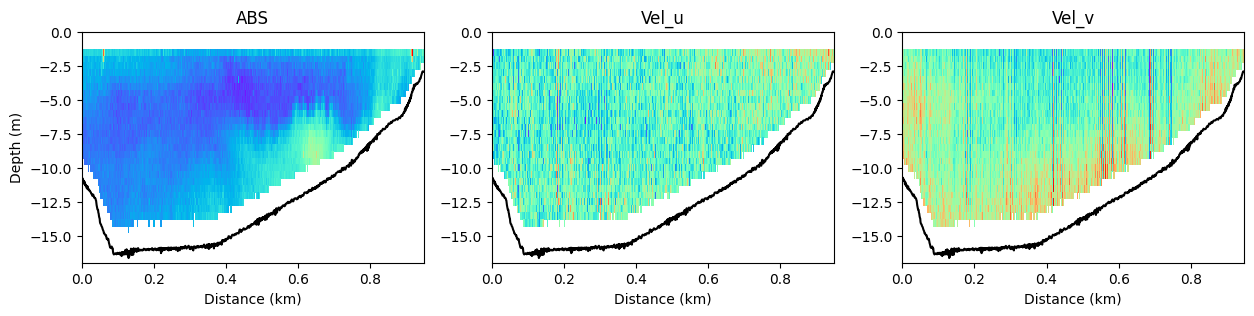

In [88]:
fig, axs = plt.subplots(1,3, figsize=(15,3))

axs[0].pcolor(distance, -levels, s_abs.T, cmap='rainbow')
axs[1].pcolor(distance, -levels, s_vel_u.T, cmap='rainbow')
axs[2].pcolor(distance, -levels, s_vel_v.T, cmap='rainbow')

axs[0].set_ylabel('Depth (m)')
titles = ['ABS', 'Vel_u', 'Vel_v']
for i, ax in enumerate(axs):
    ax.plot(distance, -s_depth, 'k')
    ax.set_title(titles[i])
    ax.set_xlabel('Distance (km)')
    ax.set_ylim(-17, 0)
    

In [118]:
d_dist = 0.02 # inerval of distance to average, km 

dist_classes = np.arange(0, np.max(distance)+.01, d_dist)

a_depth = []
a_vel_u = []
a_vel_v = []
a_abs = []
for i in range(1, len(dist_classes)):
    idx = np.array( np.where(
                             (distance >= dist_classes[i-1]) 
                             &
                             (distance < dist_classes[i])
                              )).squeeze()

    a_depth.append(np.nanmean(s_depth[idx]))
    a_vel_u.append(np.nanmean(s_vel_u[idx,:], axis=0))
    a_vel_v.append(np.nanmean(s_vel_v[idx,:], axis=0))
    a_abs.append(np.nanmean(s_abs[idx,:], axis=0))

a_depth = np.array(a_depth)
a_vel_u = np.array(a_vel_u)
a_vel_v = np.array(a_vel_v)
a_abs = np.array(a_abs)

a_dist = (dist_classes[1:] + dist_classes[:-1])/2

C:\Users\gutos\AppData\Local\Temp\ipykernel_6804\2134744641.py:17: RuntimeWarning: Mean of empty slice
  a_vel_u.append(np.nanmean(s_vel_u[idx,:], axis=0))
C:\Users\gutos\AppData\Local\Temp\ipykernel_6804\2134744641.py:18: RuntimeWarning: Mean of empty slice
  a_vel_v.append(np.nanmean(s_vel_v[idx,:], axis=0))
C:\Users\gutos\AppData\Local\Temp\ipykernel_6804\2134744641.py:19: RuntimeWarning: Mean of empty slice
  a_abs.append(np.nanmean(s_abs[idx,:], axis=0))


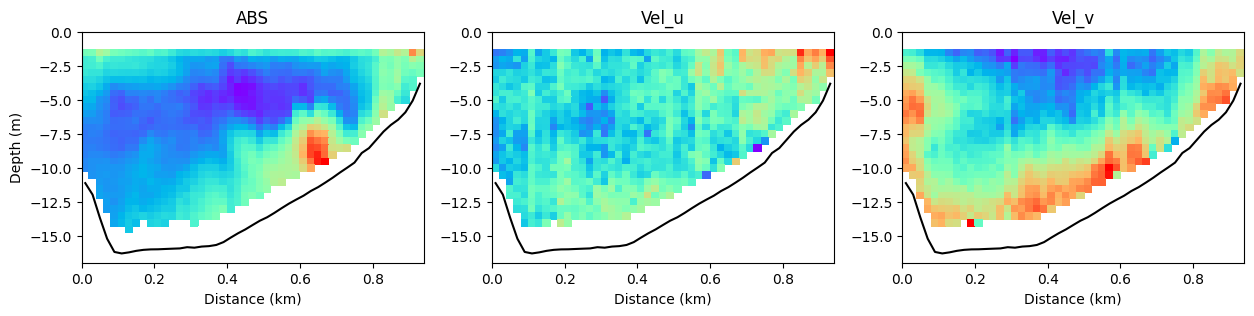

In [119]:
fig, axs = plt.subplots(1,3, figsize=(15,3))

axs[0].pcolor(a_dist, -levels, a_abs.T, cmap='rainbow')
axs[1].pcolor(a_dist, -levels, a_vel_u.T, cmap='rainbow')
axs[2].pcolor(a_dist, -levels, a_vel_v.T, cmap='rainbow')

axs[0].set_ylabel('Depth (m)')
titles = ['ABS', 'Vel_u', 'Vel_v']
for i, ax in enumerate(axs):
    ax.plot(a_dist, -a_depth, 'k')
    ax.set_title(titles[i])
    ax.set_xlabel('Distance (km)')
    ax.set_ylim(-17, 0)
    

Aftter averaging, we need to check if it is necessary to rotate the velocity componentes to the main channel axis to have the longitudinal ans transversal components of the currents.  

In the present case, the currents are (as expected based on the base map) already oriented as u - cross-channel, v - along-channel, and no need for rotation. 

https://gutoschettini.github.io/Data-Analysis-with-Python/Schettini_20211101_vetores.pdf

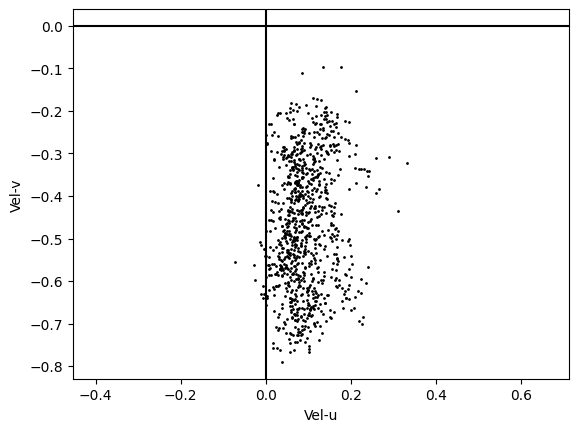

In [126]:
plt.plot(a_vel_u, a_vel_v, 'k.', ms=2)
plt.axis('equal')
plt.xlabel('Vel-u')
plt.ylabel('Vel-v')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.show()

### A pretty figure...

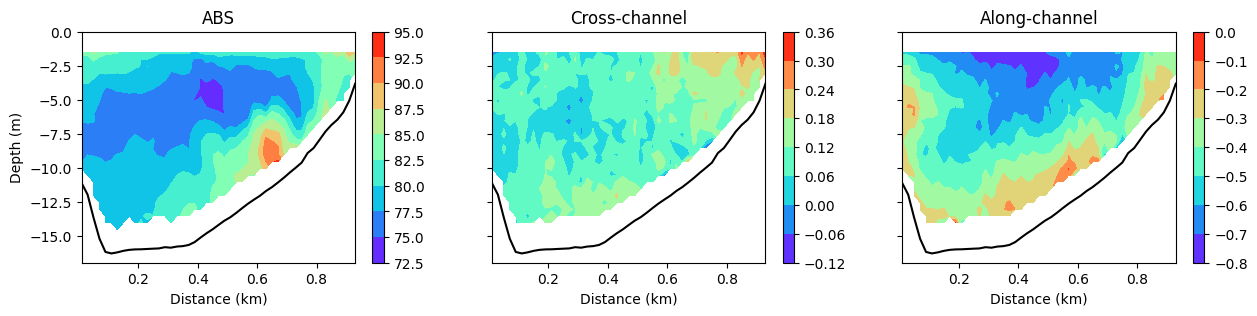

In [137]:
fig, axs = plt.subplots(1,3, figsize=(15,3))

cb1 = axs[0].contourf(a_dist, -levels, a_abs.T, cmap='rainbow')
cb2 = axs[1].contourf(a_dist, -levels, a_vel_u.T, cmap='rainbow')
cb3 = axs[2].contourf(a_dist, -levels, a_vel_v.T, cmap='rainbow')

axs[0].set_ylabel('Depth (m)')
titles = ['ABS', 'Cross-channel', 'Along-channel']
for i, ax in enumerate(axs):
    ax.plot(a_dist, -a_depth, 'k')
    ax.set_title(titles[i])
    ax.set_xlabel('Distance (km)')
    ax.set_ylim(-17, 0)
    if i > 0:
        ax.set_yticklabels('')

fig.colorbar(cb1, ax=axs[0])
fig.colorbar(cb2, ax=axs[1])
fig.colorbar(cb3, ax=axs[2])

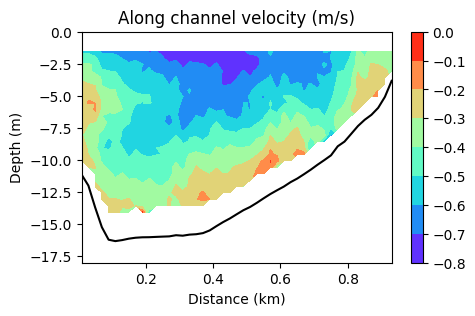

In [143]:
fig, ax = plt.subplots(figsize=(5,3))

cb3 = ax.contourf(a_dist, -levels, a_vel_v.T, cmap='rainbow')
ax.plot(a_dist, -a_depth, 'k')
ax.set_ylim(-18, 0)
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Depth (m)')
ax.set_title('Along channel velocity (m/s)')
fig.colorbar(cb3, ax=ax)